# To study and understand the concept of ROC Curve and AUC in binary classification problems on Social_Network_Ads.csv dataset.
                                           
                                                                                     -By Aditya Nikam(TE AI & DS)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')#we use this to ignore the warnings means in the output warnings should not appear

C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\champ\Downloads\Social_Network_Ads.csv")#this is to import the dataset.
#The dataset is a csv file.df is the name given to the dataset
df#this is written to display the dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [3]:
#AUC means Area Under Curve and ROC means Receiver Operating Characterstics
#It is a graph that helps us understand how good a classification model is at separating two classes, like Yes or No
#Email spam or not spam etc means basically binary clasification

#Imagine you built a model that predicts whether a person has a disease or not.
#The ROC Curve tells you:
#“How well is my model separating the sick from the healthy people?”

#Suppose we have S shaped curve of logistic regression.We have to predict whether a person has disease or not.We know that
#we have a value called as threshold in logistic regression which is by default 0.5.Now suppose we have to predict that 
#whether has a disease or not

#Threshold value is value that decides whether the model output is 1 or 0.We can change threshold value to any number
#between 0 and 1 like 0.6,0.7,0.3 etc

#Example:
#Let’s say the model predicts:

#Person        Probability of having a disease
#A                   0.9
#B                   0.7
#C                   0.4
#D                   0.1

#Now if we set the threshold = 0.5:
#Person A (0.9) → Yes
#Person B (0.7) → Yes
#Person C (0.4) → No
#Person D (0.1) → No

#If probablity is greater than or equal to threshold then the output will be 1 and if less than threshold then output
#will be zero

#ROC Curve is the curve between True Positve Rate(TPR) and False Positive Rate(FPR)

In [4]:
df.head()#it display the first five rows of the dataset.Its default value is 5

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
#Lets convert Gender column values into numerical
df["Gender"]=df["Gender"].replace({"Female":0,"Male":1})#Now 1 represents male and 0 represents female
df.head()
#We converted the Gender column values to 1 and 0 because we are going to apply Logistic Regression and all machine 
#learning algorithms only understand numeric data and not categorical so we converted the values
#Now all data in dataset is numeric now we can appy Logistic Regression

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,19000.0,0
1,15810944,1,35.0,20000.0,0
2,15668575,0,26.0,43000.0,0
3,15603246,0,27.0,57000.0,0
4,15804002,1,19.0,76000.0,0


In [6]:
x=df[["User ID","Gender","Age","EstimatedSalary"]]#Input to our model
y=df["Purchased"]#this is the output of our model

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)#We are dividing the values of the User
#ID,Gender,Age and Estimated Salary which are inputs(X) for the model and Purchased which is output for the model(Y)
#So we are dividing their values into training and testing 80% of data is training
#test_size=0.2 denotes 20% of data wil be testing dataset
#random state ensures that whenever we run the program every time the same values of the data are taken for training 
#and testing means suppose we have 100 records in our data out of which we are using 80  for training and 20 for testing
#so every time the same 80 values will be in training and same 20 values will be in testing means not a single record of 
#training data will go in the testing data and not single value of testing data will come in training data means there will
#be no shuffling of records the same data will be used for training and testing every time we run the program this is 
#the use of random state

#In random_state=42 42 is just a normal number there is no role of zero we have to just write it when we are using 
#random_state  we can use any other number other than zero as well like 1,4,10 etc.42 is the most common number you see
#in programs

In [8]:
model = LogisticRegression()#we created object of Logistic Regression

#Logistic Regression is used for classification problems.In Linear regression we predicted numerical value but 
#Logistic Regression is used to predict categorial value like whether the email is spam or not(binary classification as 
#only two values “spam” or “not spam”),Positive or Negative,Pass or Fail,Yes or No,True or False,will the customer buy 
#insurance or not etc.In Logistic Regression the Sigmoid Function converts the Input variable(X) between 0 and 1.
#The formula of Sigmoid function is  y=1/1+e^-x here y is dependent variable(what we want to predict) and x is Independent
#variable and  the graph is of S shape.

In [9]:
model.fit(xtrain, ytrain)#it teaches the Logistic regression model using the training dataset means here we have the inputs
#in xtrain and we have outputs also already defit for the inputs in ytrain now the model learns this data so that it 
#can predict values when any unseen/new data comes to predict

LogisticRegression()

In [10]:
y_pred = model.predict(xtest)#it tells the model to predict the output for the input(xtest).We are testing the model here
#after training

In [11]:
from sklearn.metrics import accuracy_score #sklearn.metric is used to import metrics
score=accuracy_score(ytest,y_pred)#Accuracy score formula is number of correct predictions/total no.of predictions
#ytest means the correct outputs and y_predicted means predicted outputs
score#We see that our accuracy is 0.7375 means 73.75% so it is not very good nor very bad
#To

0.7375

In [12]:
yprobs=model.predict_proba(xtest)[:,-1]
y_pred#it gives the probablities of y_pred values for each ytest values

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [13]:
fpr, tpr, thresholds = roc_curve(ytest, yprobs)#it calculates the values of fpr,tpr and thresholds which are needed for 
#ROC curve
print("FPR=",fpr)
print("TPR=",fpr)
print("Threshold=",thresholds)

FPR= [0.         0.         0.         0.05769231 0.05769231 0.11538462
 0.11538462 0.25       0.25       0.51923077 0.51923077 0.82692308
 0.82692308 0.90384615 0.90384615 0.92307692 0.92307692 0.96153846
 0.96153846 1.        ]
TPR= [0.         0.         0.         0.05769231 0.05769231 0.11538462
 0.11538462 0.25       0.25       0.51923077 0.51923077 0.82692308
 0.82692308 0.90384615 0.90384615 0.92307692 0.92307692 0.96153846
 0.96153846 1.        ]
Threshold= [1.76768175 0.76768175 0.6725371  0.56897468 0.45040132 0.4243592
 0.41341953 0.38807756 0.37465879 0.28410253 0.28348805 0.20319558
 0.1695798  0.1473997  0.13853513 0.13848618 0.13645934 0.13124881
 0.12912214 0.1264397 ]


In [14]:
auc_score=roc_auc_score(ytest,yprobs)#it calculates the AUC score
print(f"AUC Score:{auc_score:.2f}")

AUC Score:0.64


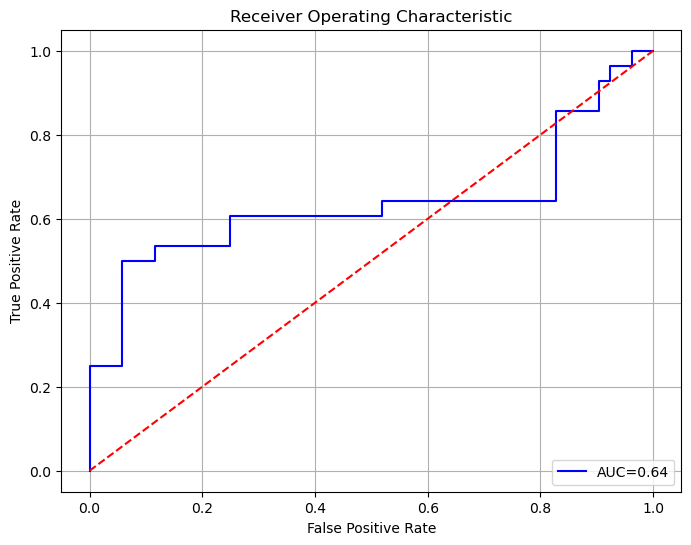

In [15]:
plt.figure(figsize=(8,6))#it sets the size of the plot as 8 inches wide and 6 inches tall
plt.plot(fpr, tpr, color='blue', label=f'AUC={auc_score:.2f}')  # it plots the fpr and tpr values in the plot
#so that we get our roc curve in blue color
#area = %0.2f means show AUC value upto 2 decimal places only
plt.plot([0, 1], [0, 1], color='red', linestyle='--')#It draw a red dotted line from point(0,0)to point(1,1) means it draws 
#centre line for the plot
plt.xlabel('False Positive Rate')#label given to x axis
plt.ylabel('True Positive Rate')#label given to y axis
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")#position of legend is set to lower right of the plot
plt.grid(True)#it draws grid line on the plot
plt.show()#used to diplay the plot